In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
data = pd.read_parquet('resources/DDoS1-Tuesday-20-02-2018_TrafficForML_CICFlowMeter.parquet')

In [36]:
print("Dataset shape:", data.shape)
print("\nData types:\n", data.dtypes.value_counts())
print("\nFirst 5 rows:\n", data.head())
print("\nColumn names:\n", data.columns.tolist())

Dataset shape: (954846, 78)

Data types:
 int32       24
float32     22
int8        21
int16        8
float64      2
category     1
Name: count, dtype: int64

First 5 rows:
    Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0         6         888751                 11                      11   
1         0      112642816                  3                       0   
2         0      112642712                  3                       0   
3         0      112642648                  3                       0   
4         0      112642702                  3                       0   

   Fwd Packets Length Total  Bwd Packets Length Total  Fwd Packet Length Max  \
0                      1249                      1969                    736   
1                         0                         0                      0   
2                         0                         0                      0   
3                         0                         0              

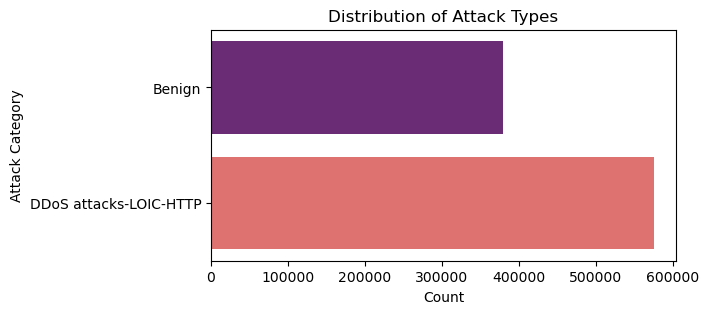

In [37]:
plt.figure(figsize=(6, 3))
label_dist = data['Label'].value_counts()
sns.barplot(x=label_dist.values, y=label_dist.index,
            palette='magma', hue=label_dist.index)
plt.title('Distribution of Attack Types')
plt.xlabel('Count')
plt.ylabel('Attack Category')
plt.show()

In [38]:
numerical_cols = data.select_dtypes(include=np.number).columns
print("\nStatistical summary:\n")
data[numerical_cols].describe().transpose()


Statistical summary:



,count,mean,std,min,25%,50%,75%,max
Protocol,954846.0,7.338671e+00,3.712608e+00,0.0,6.00,6.0,6.00,17.0
Flow Duration,954846.0,1.396088e+07,2.573701e+07,1.0,871935.75,1583957.0,17486064.75,120000000.0
Total Fwd Packets,954846.0,9.790687e+01,3.585697e+03,1.0,2.00,3.0,3.00,280043.0
Total Backward Packets,954846.0,5.907444e+00,1.509601e+02,0.0,0.00,2.0,4.00,21514.0
Fwd Packets Length Total,954846.0,3.186493e+03,1.147440e+05,0.0,0.00,20.0,45.00,8961376.0
...,...,...,...,...,...,...,...,...
Active Min,954846.0,2.500052e+04,3.737532e+05,0.0,0.00,0.0,0.00,75941227.0
Idle Mean,954846.0,8.280780e+06,1.522683e+07,0.0,0.00,0.0,10500000.00,119996344.0
Idle Std,954846.0,8.148981e+04,1.256392e+06,0.0,0.00,0.0,0.00,70897776.0
Idle Max,954846.0,8.352374e+06,1.532748e+07,0.0,0.00,0.0,10600000.00,119996345.0


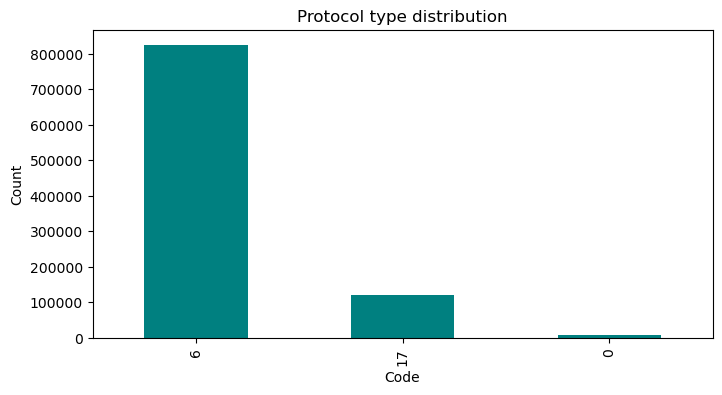

In [39]:
plt.figure(figsize=(8, 4))
data['Protocol'].value_counts().plot(kind='bar', color='teal')
plt.title('Protocol type distribution')
plt.xlabel('Code')
plt.ylabel('Count')
plt.show()

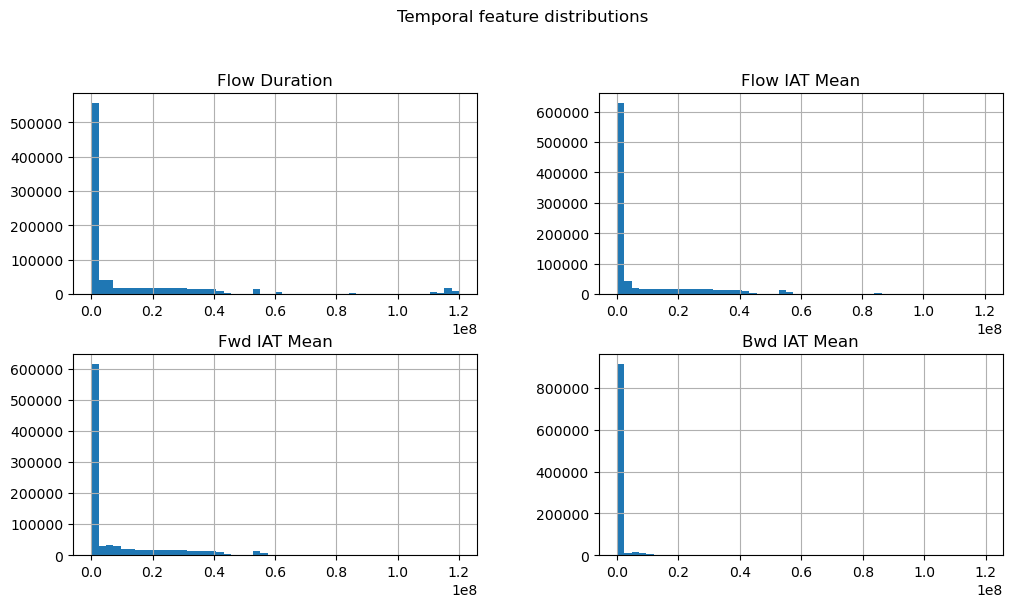

In [40]:
time_features = ['Flow Duration', 'Flow IAT Mean',
                 'Fwd IAT Mean', 'Bwd IAT Mean']
data[time_features].hist(bins=50, figsize=(12, 6), layout=(2, 2))
plt.suptitle('Temporal feature distributions', y=1.02)
plt.show()

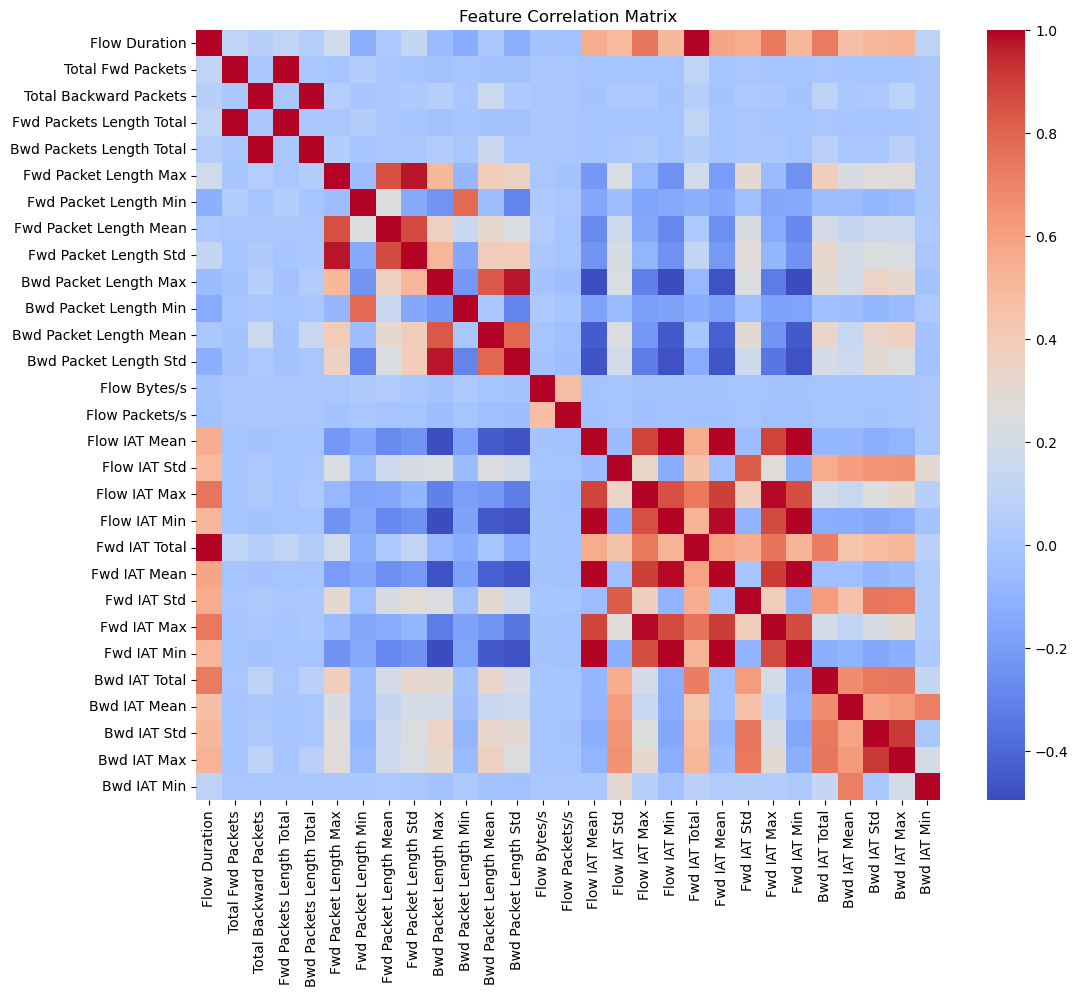

In [54]:
selected_features = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
                     'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min']
plt.figure(figsize=(12, 10))
corr_matrix = data[selected_features].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

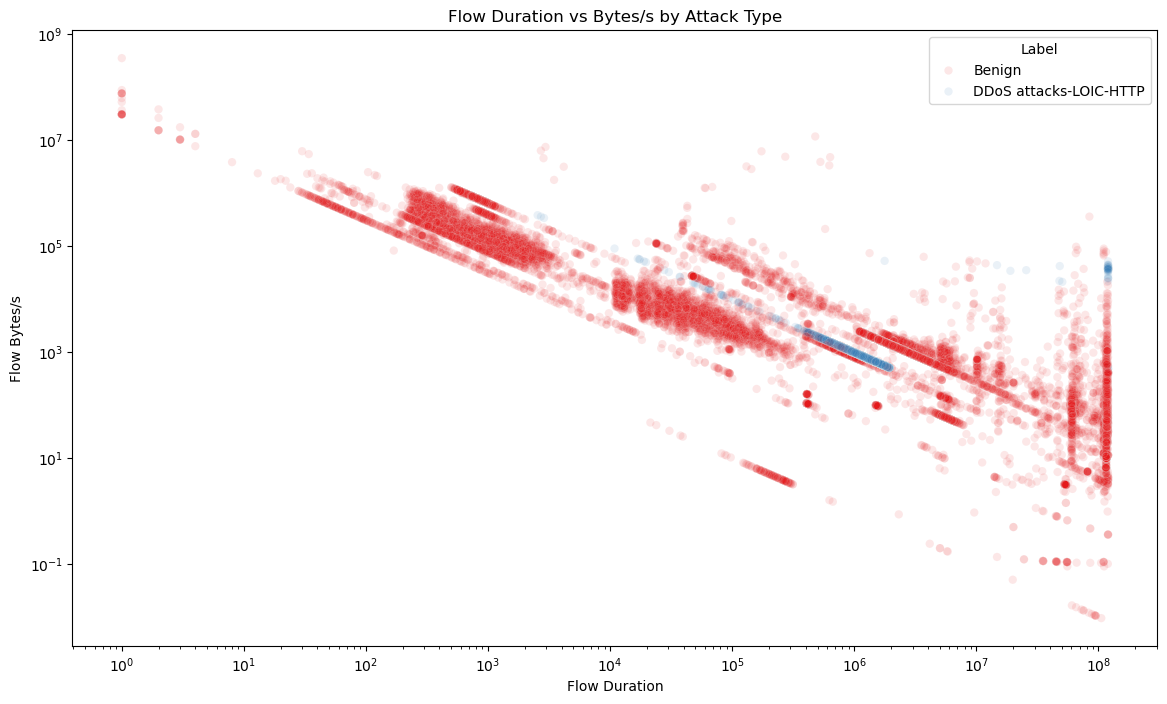

In [ ]:
attack_sample = data.sample(n=50000, random_state=42)
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Flow Duration', y='Flow Bytes/s', hue='Label',
                data=attack_sample, palette='Set1', alpha=0.1)
plt.title('Flow Duration vs Bytes/s by Attack Type')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [ ]:
flag_columns = ['FIN Flag Count', 'SYN Flag Count', 'RST Flag Count',
                'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count']

flag_stats = data[flag_columns].describe().transpose()
print("\nTCP Flag Statistics:\n", flag_stats)


TCP Flag Statistics:
                    count      mean       std  min  25%  50%  75%  max
FIN Flag Count  954846.0  0.001455  0.038113  0.0  0.0  0.0  0.0  1.0
SYN Flag Count  954846.0  0.017187  0.129968  0.0  0.0  0.0  0.0  1.0
RST Flag Count  954846.0  0.334918  0.471962  0.0  0.0  0.0  1.0  1.0
PSH Flag Count  954846.0  0.493847  0.499962  0.0  0.0  0.0  1.0  1.0
ACK Flag Count  954846.0  0.371305  0.483154  0.0  0.0  0.0  1.0  1.0
URG Flag Count  954846.0  0.010424  0.101563  0.0  0.0  0.0  0.0  1.0


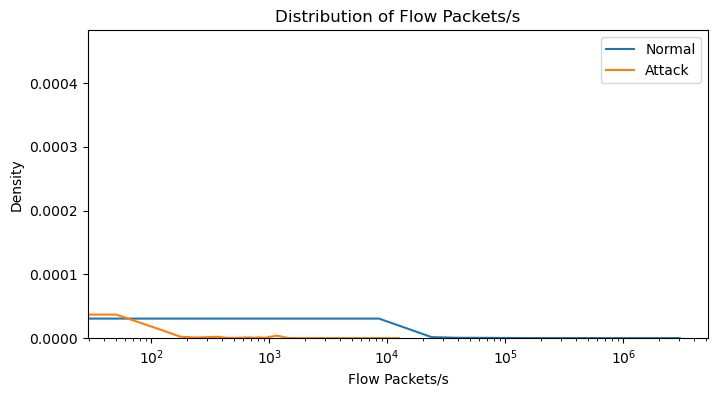

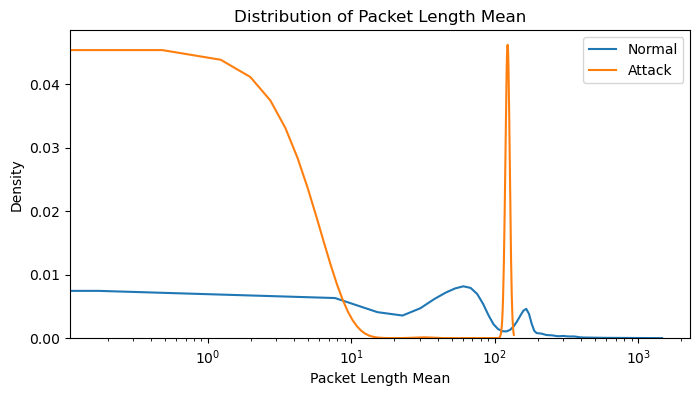

In [ ]:
def plot_behavioral_features(feature, logx=False, logy=False):
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=data[data['Label'] == 'Benign'][feature], label='Normal')
    sns.kdeplot(data=data[data['Label'] != 'Benign'][feature], label='Attack')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    if logx:
        plt.xscale('log')
    if logy:
        plt.yscale('log')
    plt.legend()
    plt.show()


plot_behavioral_features('Flow Packets/s', logx=True)
plot_behavioral_features('Packet Length Mean', logx=True)